In [1]:
# AeroCNN-II
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import datetime
%matplotlib inline

In [2]:
n_kernel=25
l2Regularizer=1e-09
kernel_size1 = 5
kernel_size2 = 5
#kernel_size3 = 5
n_grid = 101
strides = 1
input_size = 100

In [3]:
alpha = np.linspace(-10,20,16).reshape((16,1))

In [4]:
aa = np.zeros((16*133,1))
for i in range(0, 133):
    aa[16*i:16*(i+1), :] = alpha[:,:]

In [5]:
aa = aa.reshape((133, 16, 1, 1))

In [6]:
os.chdir('D:\\AeroCNN2Inputs')

In [7]:
origin = "D:\\AeroCNN2Inputs"
origin_data = "D:\\AirfoilClCdCoordinates_out\\AirfoilClCdCoordinates_out"
origin_coord = "D:\\AirfoilClCdCoordinates_out\\AirfoilClCdCoordinates_out"

In [8]:
folders_orig = os.listdir(origin)
folders = [file for file in folders_orig if file.endswith('.csv')]

In [9]:
image_df = pd.DataFrame()
for i in range(1, 134):
    for j in range(0, alpha.shape[0]):
        csv_file_name = origin + '\\airfoil' + str(i) + "_alpha"+ str(int(alpha[j])) + ".csv"
        data = pd.read_csv(csv_file_name, header=None)
        image_df = pd.concat([image_df, data], axis=0)

In [10]:
image_np = image_df.iloc[:, :].values

In [11]:
image = image_np.reshape((133, 16, 100, 100))

In [12]:
image = 1-image/100

In [13]:
image.shape

(133, 16, 100, 100)

In [14]:
image[0,0,:,:]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

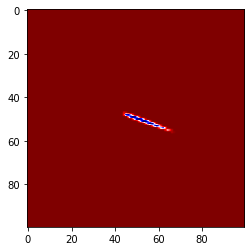

In [15]:
aaa=plt.imshow(image[0,15,:,:].T, cmap='seismic')
aaa.colorbar

In [16]:
cl_df = pd.DataFrame()
for i in range(1, 134):
    for alpha_ in alpha:
        cl_name = origin_coord + "\\airfoil" + str(i) + "\\"+ str(int(alpha_)) + "\\Cl_" + str(i) + "_"+ str(int(alpha_)) +".txt"
        data = pd.read_csv(cl_name, sep = ",", header=None)
        cl_df = pd.concat([cl_df, data], axis=0)

In [17]:
cd_df = pd.DataFrame()
for i in range(1, 134):
    for alpha_ in alpha:
        cd_name = origin_coord + "\\airfoil" + str(i) + "\\"+ str(int(alpha_)) + "\\Cd_" + str(i) + "_"+ str(int(alpha_)) +".txt"
        data = pd.read_csv(cd_name, sep = ",", header=None)
        cd_df = pd.concat([cd_df, data], axis=0)

In [18]:
cl = cl_df.iloc[:, :].values.reshape((-1,1))
cd = cd_df.iloc[:, :].values.reshape((-1,1))
y = np.hstack((cl, cd))

In [19]:
y = y.reshape((133, 16, 2, 1))

In [20]:
file_name = origin_data + "\\AirfoilIndexList.xlsx"
airfoilName_df = pd.read_excel(file_name)
geometry_orig = airfoilName_df.iloc[:, 1].values

In [21]:
geometry = np.zeros((133*16,1))
geometry = geometry.astype(np.string_)
for i in geometry_orig:
    index_ = np.where(geometry_orig==i)
    for j in range(0,16):
        geometry[16*index_[0]+j,:] = np.asarray(i)

In [22]:
geometry.shape

(2128, 1)

In [23]:
geometry = geometry.reshape((133, 16, 1))

In [24]:
x_train, x_test, aa_train, aa_test, geo_train, geo_test, y_train, y_test = train_test_split(iage, aa, geometry, y, test_size=0.05, random_state=1)

In [25]:
x_train = x_train.reshape((x_train.shape[0]*x_train.shape[1], x_train.shape[2], x_train.shape[3], 1))
x_test = x_test.reshape((x_test.shape[0]*x_test.shape[1], x_test.shape[2], x_test.shape[3], 1))
aa_train = aa_train.reshape((aa_train.shape[0]*aa_train.shape[1], aa_train.shape[2], aa_train.shape[3]))
aa_test = aa_test.reshape((aa_test.shape[0]*aa_test.shape[1], aa_test.shape[2], aa_test.shape[3]))
geo_train = geo_train.reshape((geo_train.shape[0]*geo_train.shape[1], geo_train.shape[2]))
geo_test = geo_test.reshape((geo_test.shape[0]*geo_test.shape[1], geo_test.shape[2]))
y_train = y_train.reshape((y_train.shape[0]*y_train.shape[1], y_train.shape[2], y_train.shape[3]))
y_test = y_test.reshape((y_test.shape[0]*y_test.shape[1], y_test.shape[2], y_test.shape[3]))

In [26]:
x_train.shape

(2016, 100, 100, 1)

In [27]:
input_image = tf.keras.Input(shape=(100, 100, 1))

x_conv = tf.keras.layers.Conv2D(n_kernel, (kernel_size1, kernel_size1), strides=(strides, strides),
                                activation='relu', padding='same',
                                kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer),
                                name='Conv2DLayer1')(input_image)
x_ = tf.keras.layers.MaxPooling2D((2,2))(x_conv)
x_conv = tf.keras.layers.Conv2D(n_kernel, (kernel_size2, kernel_size2), strides=(strides, strides),
                                activation='relu', padding='same',
                                kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer),
                                name='Conv2DLayer2')(x_)
x_ = tf.keras.layers.MaxPooling2D((2,2))(x_conv)
x_conv = tf.keras.layers.Conv2D(n_kernel, (kernel_size2, kernel_size2), strides=(strides, strides),
                                activation='relu', padding='same',
                                kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer),
                                name='Conv2DLayer3')(x_)
x_ = tf.keras.layers.MaxPooling2D((2,2))(x_conv)
reshape1 = tf.keras.layers.Flatten()(x_)

x_ = tf.keras.layers.Dense(units=200, activation='relu', name='firstHiddenLayer',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(reshape1)
x_ = tf.keras.layers.Dense(units=100, activation='relu', name='secondHiddenLayer',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)

output_data = tf.keras.layers.Dense(units=2, activation=None, name='outputLayer')(x_)
output_image = tf.keras.layers.Reshape((2, 1))(output_data)
# AeroCNN-II
model = tf.keras.Model(input_image, output_image)

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 Conv2DLayer1 (Conv2D)       (None, 100, 100, 25)      650       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 25)       0         
 )                                                               
                                                                 
 Conv2DLayer2 (Conv2D)       (None, 50, 50, 25)        15650     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 25)       0         
 2D)                                                             
                                                                 
 Conv2DLayer3 (Conv2D)       (None, 25, 25, 25)        15650 

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [30]:
start = datetime.datetime.now()
history = model.fit(x_train, y_train, epochs=5000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/5000
63/63 [==============================] - 15s 7ms/step - loss: 0.1137 - rmse: 0.3372
Epoch 2/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0176 - rmse: 0.1328
Epoch 3/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.1099
Epoch 4/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.1013
Epoch 5/5000
63/63 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0951
Epoch 6/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0939
Epoch 7/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0079 - rmse: 0.0890
Epoch 8/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 9/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 10/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 11/5000
63/63 [=================

63/63 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0628
Epoch 86/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 87/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 88/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0651
Epoch 89/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 90/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 91/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 92/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 93/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 94/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 95/5000
63/63 [=======================

63/63 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0485
Epoch 169/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 170/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 171/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 172/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 173/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 174/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 175/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0504
Epoch 176/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 177/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 178/5000
63/63 [=============

63/63 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 252/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 253/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 254/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 255/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 256/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 257/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 258/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 259/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 260/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 261/5000
63/63 [=============

63/63 [==============================] - 0s 6ms/step - loss: 5.9018e-04 - rmse: 0.0243
Epoch 335/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.2930e-04 - rmse: 0.0251
Epoch 336/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2501e-04 - rmse: 0.0269
Epoch 337/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.3322e-04 - rmse: 0.0251
Epoch 338/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.6862e-04 - rmse: 0.0238
Epoch 339/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0420e-04 - rmse: 0.0265
Epoch 340/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2256e-04 - rmse: 0.0269
Epoch 341/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.2375e-04 - rmse: 0.0304
Epoch 342/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.5157e-04 - rmse: 0.0292
Epoch 343/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0392

63/63 [==============================] - 0s 6ms/step - loss: 4.3112e-04 - rmse: 0.0207
Epoch 415/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.8176e-04 - rmse: 0.0195
Epoch 416/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.0113e-04 - rmse: 0.0200
Epoch 417/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.8687e-04 - rmse: 0.0220
Epoch 418/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.1881e-04 - rmse: 0.0204
Epoch 419/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.3976e-04 - rmse: 0.0209
Epoch 420/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.7584e-04 - rmse: 0.0218
Epoch 421/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.2562e-04 - rmse: 0.0206
Epoch 422/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.6596e-04 - rmse: 0.0215
Epoch 423/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.5580e-04 - rmse: 0.

63/63 [==============================] - 0s 6ms/step - loss: 6.7635e-04 - rmse: 0.0260
Epoch 496/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.0806e-04 - rmse: 0.0225
Epoch 497/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.1714e-04 - rmse: 0.0204
Epoch 498/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.8567e-04 - rmse: 0.0196
Epoch 499/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.6729e-04 - rmse: 0.0191
Epoch 500/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.3218e-04 - rmse: 0.0182
Epoch 501/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.3681e-04 - rmse: 0.0183
Epoch 502/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.2495e-04 - rmse: 0.0180
Epoch 503/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.4373e-04 - rmse: 0.0185
Epoch 504/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.3423e-04 - rmse: 0.

63/63 [==============================] - 0s 6ms/step - loss: 7.9684e-04 - rmse: 0.0282
Epoch 576/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0360
Epoch 577/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 578/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 579/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 580/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 581/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4615e-04 - rmse: 0.0291
Epoch 582/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0154e-04 - rmse: 0.0300
Epoch 583/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.6447e-04 - rmse: 0.0237
Epoch 584/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.6885e-04 - rmse: 0.0238
Epoch 585/5000


63/63 [==============================] - 0s 6ms/step - loss: 3.3309e-04 - rmse: 0.0182
Epoch 656/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.0647e-04 - rmse: 0.0174
Epoch 657/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.8618e-04 - rmse: 0.0168
Epoch 658/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4443e-04 - rmse: 0.0156
Epoch 659/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4737e-04 - rmse: 0.0157
Epoch 660/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.0272e-04 - rmse: 0.0173
Epoch 661/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.4365e-04 - rmse: 0.0253
Epoch 662/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3176e-04 - rmse: 0.0270
Epoch 663/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3334e-04 - rmse: 0.0288
Epoch 664/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7748e-04 - rmse: 0.

63/63 [==============================] - 0s 6ms/step - loss: 3.3571e-04 - rmse: 0.0183
Epoch 736/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.8824e-04 - rmse: 0.0220
Epoch 737/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.2555e-04 - rmse: 0.0229
Epoch 738/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.3636e-04 - rmse: 0.0306
Epoch 739/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 740/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 741/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 742/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 743/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.6632e-04 - rmse: 0.0310
Epoch 744/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.8196e-04 - rmse: 0.0241
Epoch 745/5

63/63 [==============================] - 0s 6ms/step - loss: 3.2456e-04 - rmse: 0.0179
Epoch 816/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4210e-04 - rmse: 0.0155
Epoch 817/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.0860e-04 - rmse: 0.0143
Epoch 818/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.7820e-04 - rmse: 0.0132
Epoch 819/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.9139e-04 - rmse: 0.0137
Epoch 820/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5918e-04 - rmse: 0.0125
Epoch 821/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5037e-04 - rmse: 0.0121
Epoch 822/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5227e-04 - rmse: 0.0122
Epoch 823/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5360e-04 - rmse: 0.0123
Epoch 824/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5508e-04 - rmse: 0.

63/63 [==============================] - 0s 7ms/step - loss: 1.3587e-04 - rmse: 0.0115
Epoch 896/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.2950e-04 - rmse: 0.0113
Epoch 897/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.2672e-04 - rmse: 0.0111
Epoch 898/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.2926e-04 - rmse: 0.0112
Epoch 899/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.3890e-04 - rmse: 0.0117
Epoch 900/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.2918e-04 - rmse: 0.0112
Epoch 901/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.3059e-04 - rmse: 0.0113
Epoch 902/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.3384e-04 - rmse: 0.0114
Epoch 903/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.3331e-04 - rmse: 0.0114
Epoch 904/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.3583e-04 - rmse: 0.

63/63 [==============================] - 0s 7ms/step - loss: 1.4201e-04 - rmse: 0.0118
Epoch 976/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5401e-04 - rmse: 0.0123
Epoch 977/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5145e-04 - rmse: 0.0122
Epoch 978/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5434e-04 - rmse: 0.0123
Epoch 979/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.6859e-04 - rmse: 0.0129
Epoch 980/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5658e-04 - rmse: 0.0124
Epoch 981/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5134e-04 - rmse: 0.0122
Epoch 982/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5884e-04 - rmse: 0.0125
Epoch 983/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.9575e-04 - rmse: 0.0139
Epoch 984/5000
63/63 [==============================] - 0s 7ms/step - loss: 1.5465e-04 - rmse: 0.

63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 1056/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 1057/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 1058/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 1059/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 1060/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7035e-04 - rmse: 0.0277
Epoch 1061/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.9052e-04 - rmse: 0.0221
Epoch 1062/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.0509e-04 - rmse: 0.0174
Epoch 1063/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.3834e-04 - rmse: 0.0153
Epoch 1064/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2092e-04 - rmse: 0.0148
Epoch 

63/63 [==============================] - 0s 6ms/step - loss: 8.0314e-04 - rmse: 0.0283
Epoch 1135/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 1136/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4820e-04 - rmse: 0.0273
Epoch 1137/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.6725e-04 - rmse: 0.0215
Epoch 1138/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.2068e-04 - rmse: 0.0178
Epoch 1139/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4516e-04 - rmse: 0.0155
Epoch 1140/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.1933e-04 - rmse: 0.0147
Epoch 1141/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.7388e-04 - rmse: 0.0131
Epoch 1142/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5477e-04 - rmse: 0.0159
Epoch 1143/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4688e-04 - rms

63/63 [==============================] - 0s 6ms/step - loss: 5.0439e-04 - rmse: 0.0224
Epoch 1214/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.2695e-04 - rmse: 0.0206
Epoch 1215/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.9083e-04 - rmse: 0.0242
Epoch 1216/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.2123e-04 - rmse: 0.0204
Epoch 1217/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.9712e-04 - rmse: 0.0171
Epoch 1218/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.9507e-04 - rmse: 0.0138
Epoch 1219/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6166e-04 - rmse: 0.0126
Epoch 1220/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4013e-04 - rmse: 0.0117
Epoch 1221/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2830e-04 - rmse: 0.0112
Epoch 1222/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4817e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 5.0298e-04 - rmse: 0.0223
Epoch 1293/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.1743e-04 - rmse: 0.0177
Epoch 1294/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8922e-04 - rmse: 0.0136
Epoch 1295/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.7246e-04 - rmse: 0.0130
Epoch 1296/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4592e-04 - rmse: 0.0119
Epoch 1297/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2237e-04 - rmse: 0.0109
Epoch 1298/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1530e-04 - rmse: 0.0106
Epoch 1299/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1957e-04 - rmse: 0.0108
Epoch 1300/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3061e-04 - rmse: 0.0113
Epoch 1301/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3265e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.4757e-04 - rmse: 0.0120
Epoch 1372/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3718e-04 - rmse: 0.0116
Epoch 1373/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3848e-04 - rmse: 0.0116
Epoch 1374/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.9271e-04 - rmse: 0.0170
Epoch 1375/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.2229e-04 - rmse: 0.0228
Epoch 1376/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.0020e-04 - rmse: 0.0199
Epoch 1377/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.2550e-04 - rmse: 0.0179
Epoch 1378/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2190e-04 - rmse: 0.0148
Epoch 1379/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8134e-04 - rmse: 0.0133
Epoch 1380/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8459e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.6793e-04 - rmse: 0.0128
Epoch 1451/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5248e-04 - rmse: 0.0122
Epoch 1452/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.9037e-04 - rmse: 0.0137
Epoch 1453/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4072e-04 - rmse: 0.0154
Epoch 1454/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.9317e-04 - rmse: 0.0138
Epoch 1455/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8616e-04 - rmse: 0.0135
Epoch 1456/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.9753e-04 - rmse: 0.0139
Epoch 1457/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.0479e-04 - rmse: 0.0142
Epoch 1458/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8135e-04 - rmse: 0.0133
Epoch 1459/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5302e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.2855e-04 - rmse: 0.0112
Epoch 1530/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8368e-04 - rmse: 0.0134
Epoch 1531/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8511e-04 - rmse: 0.0135
Epoch 1532/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4416e-04 - rmse: 0.0118
Epoch 1533/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3836e-04 - rmse: 0.0116
Epoch 1534/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2532e-04 - rmse: 0.0110
Epoch 1535/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2481e-04 - rmse: 0.0110
Epoch 1536/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.7985e-04 - rmse: 0.0133
Epoch 1537/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.8490e-04 - rmse: 0.0168
Epoch 1538/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.7066e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.5718e-04 - rmse: 0.0124
Epoch 1609/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2447e-04 - rmse: 0.0110
Epoch 1610/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9678e-05 - rmse: 0.0098
Epoch 1611/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.4287e-05 - rmse: 0.0095
Epoch 1612/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0894e-04 - rmse: 0.0102
Epoch 1613/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.6906e-05 - rmse: 0.0096
Epoch 1614/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0049e-04 - rmse: 0.0098
Epoch 1615/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0226e-04 - rmse: 0.0099
Epoch 1616/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4171e-04 - rmse: 0.0117
Epoch 1617/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1773e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 9.9067e-05 - rmse: 0.0097
Epoch 1688/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9130e-05 - rmse: 0.0097
Epoch 1689/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.7156e-05 - rmse: 0.0091
Epoch 1690/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9792e-05 - rmse: 0.0087
Epoch 1691/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4468e-05 - rmse: 0.0090
Epoch 1692/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.1486e-05 - rmse: 0.0088
Epoch 1693/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0299e-05 - rmse: 0.0087
Epoch 1694/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4740e-05 - rmse: 0.0090
Epoch 1695/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0435e-05 - rmse: 0.0087
Epoch 1696/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6485e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 2.2484e-04 - rmse: 0.0149
Epoch 1767/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4176e-04 - rmse: 0.0117
Epoch 1768/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2452e-04 - rmse: 0.0110
Epoch 1769/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3867e-04 - rmse: 0.0116
Epoch 1770/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3065e-04 - rmse: 0.0112
Epoch 1771/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2050e-04 - rmse: 0.0108
Epoch 1772/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3131e-04 - rmse: 0.0113
Epoch 1773/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5247e-04 - rmse: 0.0122
Epoch 1774/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.4911e-05 - rmse: 0.0095
Epoch 1775/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0785e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 1.5298e-04 - rmse: 0.0122
Epoch 1846/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0675e-04 - rmse: 0.0101
Epoch 1847/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.2940e-05 - rmse: 0.0094
Epoch 1848/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.2757e-05 - rmse: 0.0089
Epoch 1849/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.5030e-05 - rmse: 0.0090
Epoch 1850/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6968e-05 - rmse: 0.0085
Epoch 1851/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7395e-05 - rmse: 0.0085
Epoch 1852/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3017e-05 - rmse: 0.0083
Epoch 1853/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1139e-05 - rmse: 0.0082
Epoch 1854/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4546e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 2.1518e-04 - rmse: 0.0145
Epoch 1925/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.6290e-04 - rmse: 0.0161
Epoch 1926/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1491e-04 - rmse: 0.0105
Epoch 1927/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1411e-05 - rmse: 0.0093
Epoch 1928/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9532e-05 - rmse: 0.0087
Epoch 1929/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1075e-05 - rmse: 0.0082
Epoch 1930/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0416e-05 - rmse: 0.0081
Epoch 1931/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3061e-05 - rmse: 0.0083
Epoch 1932/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8601e-05 - rmse: 0.0080
Epoch 1933/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8518e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 1.0803e-04 - rmse: 0.0102
Epoch 2004/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9611e-05 - rmse: 0.0098
Epoch 2005/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.3377e-05 - rmse: 0.0094
Epoch 2006/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.8731e-05 - rmse: 0.0092
Epoch 2007/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.5691e-05 - rmse: 0.0090
Epoch 2008/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.1312e-05 - rmse: 0.0088
Epoch 2009/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.2456e-05 - rmse: 0.0088
Epoch 2010/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9353e-05 - rmse: 0.0087
Epoch 2011/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6147e-05 - rmse: 0.0085
Epoch 2012/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6984e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 1.3055e-04 - rmse: 0.0112
Epoch 2083/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3441e-04 - rmse: 0.0114
Epoch 2084/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3206e-04 - rmse: 0.0113
Epoch 2085/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1148e-04 - rmse: 0.0103
Epoch 2086/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2053e-04 - rmse: 0.0108
Epoch 2087/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1971e-04 - rmse: 0.0107
Epoch 2088/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1437e-04 - rmse: 0.0105
Epoch 2089/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1658e-04 - rmse: 0.0106
Epoch 2090/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2848e-04 - rmse: 0.0111
Epoch 2091/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1750e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.5520e-04 - rmse: 0.0123
Epoch 2162/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4764e-04 - rmse: 0.0120
Epoch 2163/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2714e-04 - rmse: 0.0111
Epoch 2164/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2677e-04 - rmse: 0.0111
Epoch 2165/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3283e-04 - rmse: 0.0113
Epoch 2166/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2571e-04 - rmse: 0.0110
Epoch 2167/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.7466e-04 - rmse: 0.0130
Epoch 2168/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5344e-04 - rmse: 0.0122
Epoch 2169/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3222e-04 - rmse: 0.0113
Epoch 2170/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6932e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.3851e-04 - rmse: 0.0116
Epoch 2241/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.8273e-05 - rmse: 0.0097
Epoch 2242/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.3272e-05 - rmse: 0.0094
Epoch 2243/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.2477e-05 - rmse: 0.0088
Epoch 2244/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3243e-05 - rmse: 0.0089
Epoch 2245/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0539e-04 - rmse: 0.0100
Epoch 2246/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1929e-04 - rmse: 0.0107
Epoch 2247/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.4832e-04 - rmse: 0.0185
Epoch 2248/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.6889e-04 - rmse: 0.0163
Epoch 2249/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.0835e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 7.4736e-05 - rmse: 0.0084
Epoch 2320/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9184e-05 - rmse: 0.0080
Epoch 2321/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2657e-05 - rmse: 0.0082
Epoch 2322/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9384e-05 - rmse: 0.0086
Epoch 2323/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6054e-05 - rmse: 0.0084
Epoch 2324/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4558e-05 - rmse: 0.0084
Epoch 2325/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7548e-05 - rmse: 0.0085
Epoch 2326/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6081e-05 - rmse: 0.0085
Epoch 2327/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4662e-05 - rmse: 0.0084
Epoch 2328/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.5520e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 8.9070e-05 - rmse: 0.0092
Epoch 2399/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0170e-04 - rmse: 0.0099
Epoch 2400/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.7329e-05 - rmse: 0.0096
Epoch 2401/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.8157e-05 - rmse: 0.0097
Epoch 2402/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.7031e-05 - rmse: 0.0096
Epoch 2403/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0169e-04 - rmse: 0.0099
Epoch 2404/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0033e-04 - rmse: 0.0098
Epoch 2405/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.5859e-05 - rmse: 0.0096
Epoch 2406/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.1476e-04 - rmse: 0.0203
Epoch 2407/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.6152e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.6263e-04 - rmse: 0.0126
Epoch 2478/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2479e-04 - rmse: 0.0110
Epoch 2479/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1704e-04 - rmse: 0.0106
Epoch 2480/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3235e-04 - rmse: 0.0113
Epoch 2481/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5727e-04 - rmse: 0.0123
Epoch 2482/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2999e-04 - rmse: 0.0112
Epoch 2483/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4036e-04 - rmse: 0.0116
Epoch 2484/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5610e-04 - rmse: 0.0159
Epoch 2485/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5203e-04 - rmse: 0.0157
Epoch 2486/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.9687e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 7.7389e-05 - rmse: 0.0085
Epoch 2557/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9159e-05 - rmse: 0.0086
Epoch 2558/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3850e-05 - rmse: 0.0089
Epoch 2559/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0367e-05 - rmse: 0.0087
Epoch 2560/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1200e-04 - rmse: 0.0104
Epoch 2561/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.7499e-04 - rmse: 0.0164
Epoch 2562/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.8968e-04 - rmse: 0.0242
Epoch 2563/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.0089e-04 - rmse: 0.0244
Epoch 2564/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 2565/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0

63/63 [==============================] - 0s 6ms/step - loss: 7.9524e-05 - rmse: 0.0086
Epoch 2636/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6805e-05 - rmse: 0.0085
Epoch 2637/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.1232e-05 - rmse: 0.0087
Epoch 2638/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0790e-05 - rmse: 0.0087
Epoch 2639/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3596e-05 - rmse: 0.0089
Epoch 2640/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.2957e-05 - rmse: 0.0088
Epoch 2641/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0136e-05 - rmse: 0.0092
Epoch 2642/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9449e-05 - rmse: 0.0097
Epoch 2643/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1378e-04 - rmse: 0.0104
Epoch 2644/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0106e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 2.1239e-04 - rmse: 0.0144
Epoch 2715/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6155e-04 - rmse: 0.0125
Epoch 2716/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3811e-04 - rmse: 0.0115
Epoch 2717/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.3434e-04 - rmse: 0.0151
Epoch 2718/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4688e-04 - rmse: 0.0119
Epoch 2719/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3418e-04 - rmse: 0.0114
Epoch 2720/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1770e-04 - rmse: 0.0106
Epoch 2721/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2630e-04 - rmse: 0.0110
Epoch 2722/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3814e-04 - rmse: 0.0115
Epoch 2723/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1614e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 8.3080e-05 - rmse: 0.0088
Epoch 2794/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3112e-05 - rmse: 0.0088
Epoch 2795/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.6019e-05 - rmse: 0.0090
Epoch 2796/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.1880e-05 - rmse: 0.0088
Epoch 2797/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.2036e-05 - rmse: 0.0088
Epoch 2798/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.9082e-05 - rmse: 0.0092
Epoch 2799/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.9080e-05 - rmse: 0.0092
Epoch 2800/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.6978e-05 - rmse: 0.0091
Epoch 2801/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1331e-05 - rmse: 0.0093
Epoch 2802/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.4961e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 7.8665e-05 - rmse: 0.0086
Epoch 2873/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.5402e-05 - rmse: 0.0084
Epoch 2874/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.9388e-05 - rmse: 0.0092
Epoch 2875/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.7994e-05 - rmse: 0.0091
Epoch 2876/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1763e-05 - rmse: 0.0093
Epoch 2877/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.6333e-05 - rmse: 0.0096
Epoch 2878/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1028e-04 - rmse: 0.0103
Epoch 2879/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.3764e-04 - rmse: 0.0252
Epoch 2880/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 2881/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0

63/63 [==============================] - 0s 6ms/step - loss: 3.8045e-04 - rmse: 0.0194
Epoch 2952/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5964e-04 - rmse: 0.0160
Epoch 2953/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5243e-04 - rmse: 0.0121
Epoch 2954/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1866e-04 - rmse: 0.0107
Epoch 2955/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3563e-04 - rmse: 0.0114
Epoch 2956/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1216e-05 - rmse: 0.0093
Epoch 2957/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0572e-04 - rmse: 0.0100
Epoch 2958/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1546e-05 - rmse: 0.0093
Epoch 2959/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.7770e-05 - rmse: 0.0091
Epoch 2960/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2588e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 7.9976e-05 - rmse: 0.0087
Epoch 3031/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3788e-05 - rmse: 0.0083
Epoch 3032/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7052e-05 - rmse: 0.0085
Epoch 3033/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7416e-05 - rmse: 0.0085
Epoch 3034/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4009e-05 - rmse: 0.0089
Epoch 3035/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3534e-05 - rmse: 0.0089
Epoch 3036/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.8720e-05 - rmse: 0.0086
Epoch 3037/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9372e-05 - rmse: 0.0086
Epoch 3038/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0007e-05 - rmse: 0.0087
Epoch 3039/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.5662e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 7.4078e-05 - rmse: 0.0083
Epoch 3110/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4843e-05 - rmse: 0.0084
Epoch 3111/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.5553e-05 - rmse: 0.0084
Epoch 3112/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.2500e-05 - rmse: 0.0088
Epoch 3113/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4748e-05 - rmse: 0.0089
Epoch 3114/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0921e-05 - rmse: 0.0087
Epoch 3115/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6860e-05 - rmse: 0.0085
Epoch 3116/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2810e-05 - rmse: 0.0082
Epoch 3117/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2297e-05 - rmse: 0.0082
Epoch 3118/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.5138e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 5.3293e-04 - rmse: 0.0230
Epoch 3189/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.0874e-04 - rmse: 0.0201
Epoch 3190/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9163e-04 - rmse: 0.0262
Epoch 3191/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 3192/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 3193/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.0194e-04 - rmse: 0.0244
Epoch 3194/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.4373e-04 - rmse: 0.0209
Epoch 3195/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 3196/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5190e-04 - rmse: 0.0254
Epoch 3197/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.7319e-04 - rmse: 0.016

63/63 [==============================] - 0s 6ms/step - loss: 2.4201e-04 - rmse: 0.0154
Epoch 3268/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.3545e-04 - rmse: 0.0114
Epoch 3269/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0386e-04 - rmse: 0.0099
Epoch 3270/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0483e-04 - rmse: 0.0100
Epoch 3271/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0586e-04 - rmse: 0.0100
Epoch 3272/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.8301e-04 - rmse: 0.0133
Epoch 3273/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2169e-04 - rmse: 0.0147
Epoch 3274/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.0674e-04 - rmse: 0.0142
Epoch 3275/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.9268e-04 - rmse: 0.0170
Epoch 3276/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.0042e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 7.7673e-05 - rmse: 0.0085
Epoch 3347/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1278e-05 - rmse: 0.0081
Epoch 3348/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9107e-05 - rmse: 0.0080
Epoch 3349/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.7522e-05 - rmse: 0.0079
Epoch 3350/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0571e-05 - rmse: 0.0081
Epoch 3351/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4187e-05 - rmse: 0.0083
Epoch 3352/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2267e-05 - rmse: 0.0082
Epoch 3353/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1008e-05 - rmse: 0.0081
Epoch 3354/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1688e-05 - rmse: 0.0082
Epoch 3355/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4624e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 9.1122e-05 - rmse: 0.0093
Epoch 3426/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4345e-05 - rmse: 0.0089
Epoch 3427/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2218e-04 - rmse: 0.0147
Epoch 3428/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5065e-04 - rmse: 0.0157
Epoch 3429/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.2845e-04 - rmse: 0.0180
Epoch 3430/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.3200e-04 - rmse: 0.0151
Epoch 3431/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6924e-04 - rmse: 0.0128
Epoch 3432/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6072e-04 - rmse: 0.0125
Epoch 3433/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4422e-04 - rmse: 0.0118
Epoch 3434/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4574e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 6.6058e-05 - rmse: 0.0078
Epoch 3505/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.6164e-05 - rmse: 0.0078
Epoch 3506/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8621e-05 - rmse: 0.0080
Epoch 3507/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9208e-05 - rmse: 0.0080
Epoch 3508/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9469e-05 - rmse: 0.0080
Epoch 3509/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6448e-05 - rmse: 0.0084
Epoch 3510/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2684e-05 - rmse: 0.0082
Epoch 3511/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6847e-05 - rmse: 0.0085
Epoch 3512/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3000e-05 - rmse: 0.0082
Epoch 3513/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0643e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 7.5449e-05 - rmse: 0.0084
Epoch 3584/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3181e-05 - rmse: 0.0082
Epoch 3585/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2610e-05 - rmse: 0.0082
Epoch 3586/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.8235e-05 - rmse: 0.0086
Epoch 3587/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6648e-05 - rmse: 0.0085
Epoch 3588/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3764e-05 - rmse: 0.0089
Epoch 3589/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.9476e-05 - rmse: 0.0086
Epoch 3590/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.8095e-05 - rmse: 0.0085
Epoch 3591/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7606e-05 - rmse: 0.0085
Epoch 3592/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7968e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 6.9769e-05 - rmse: 0.0080
Epoch 3663/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3940e-05 - rmse: 0.0083
Epoch 3664/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.5350e-05 - rmse: 0.0084
Epoch 3665/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0464e-05 - rmse: 0.0081
Epoch 3666/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8272e-05 - rmse: 0.0079
Epoch 3667/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9757e-05 - rmse: 0.0080
Epoch 3668/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0235e-05 - rmse: 0.0081
Epoch 3669/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.7912e-05 - rmse: 0.0079
Epoch 3670/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5527e-05 - rmse: 0.0078
Epoch 3671/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9519e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 3.3250e-04 - rmse: 0.0181
Epoch 3742/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.0957e-04 - rmse: 0.0174
Epoch 3743/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4948e-04 - rmse: 0.0156
Epoch 3744/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.7081e-04 - rmse: 0.0129
Epoch 3745/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5120e-04 - rmse: 0.0121
Epoch 3746/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2627e-04 - rmse: 0.0110
Epoch 3747/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0310e-04 - rmse: 0.0099
Epoch 3748/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1255e-04 - rmse: 0.0104
Epoch 3749/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.6973e-05 - rmse: 0.0090
Epoch 3750/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3181e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 8.3616e-05 - rmse: 0.0089
Epoch 3821/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4561e-05 - rmse: 0.0089
Epoch 3822/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.6229e-05 - rmse: 0.0090
Epoch 3823/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1003e-05 - rmse: 0.0093
Epoch 3824/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.5493e-05 - rmse: 0.0095
Epoch 3825/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0982e-05 - rmse: 0.0093
Epoch 3826/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.3953e-05 - rmse: 0.0089
Epoch 3827/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0925e-05 - rmse: 0.0093
Epoch 3828/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1579e-04 - rmse: 0.0105
Epoch 3829/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2353e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 1.6149e-04 - rmse: 0.0125
Epoch 3900/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2937e-04 - rmse: 0.0111
Epoch 3901/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.9397e-04 - rmse: 0.0137
Epoch 3902/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.9955e-04 - rmse: 0.0172
Epoch 3903/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.6161e-04 - rmse: 0.0189
Epoch 3904/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 3905/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 3906/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.6180e-04 - rmse: 0.0214
Epoch 3907/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4075e-04 - rmse: 0.0153
Epoch 3908/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6288e-04 - rmse: 0

63/63 [==============================] - 0s 6ms/step - loss: 7.0156e-05 - rmse: 0.0081
Epoch 3979/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.5001e-05 - rmse: 0.0084
Epoch 3980/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9968e-05 - rmse: 0.0080
Epoch 3981/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8529e-05 - rmse: 0.0080
Epoch 3982/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2361e-05 - rmse: 0.0082
Epoch 3983/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2486e-05 - rmse: 0.0082
Epoch 3984/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3612e-05 - rmse: 0.0083
Epoch 3985/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0858e-05 - rmse: 0.0081
Epoch 3986/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2685e-05 - rmse: 0.0082
Epoch 3987/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2597e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 7.8452e-05 - rmse: 0.0086
Epoch 4058/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4754e-05 - rmse: 0.0089
Epoch 4059/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.0230e-05 - rmse: 0.0087
Epoch 4060/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.8759e-05 - rmse: 0.0086
Epoch 4061/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.4600e-05 - rmse: 0.0089
Epoch 4062/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0342e-05 - rmse: 0.0092
Epoch 4063/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.6570e-05 - rmse: 0.0090
Epoch 4064/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.1056e-05 - rmse: 0.0093
Epoch 4065/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.1071e-05 - rmse: 0.0087
Epoch 4066/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.5061e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 1.1127e-04 - rmse: 0.0103
Epoch 4137/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0440e-04 - rmse: 0.0100
Epoch 4138/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.0407e-04 - rmse: 0.0141
Epoch 4139/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.1014e-04 - rmse: 0.0143
Epoch 4140/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.4983e-04 - rmse: 0.0120
Epoch 4141/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2533e-04 - rmse: 0.0110
Epoch 4142/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.8198e-05 - rmse: 0.0096
Epoch 4143/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.1238e-05 - rmse: 0.0087
Epoch 4144/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6593e-05 - rmse: 0.0084
Epoch 4145/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2024e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 1.2640e-04 - rmse: 0.0110
Epoch 4216/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1464e-04 - rmse: 0.0105
Epoch 4217/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.5854e-05 - rmse: 0.0095
Epoch 4218/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.7010e-05 - rmse: 0.0090
Epoch 4219/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.9700e-05 - rmse: 0.0092
Epoch 4220/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.1174e-05 - rmse: 0.0087
Epoch 4221/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.7371e-05 - rmse: 0.0091
Epoch 4222/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6912e-05 - rmse: 0.0085
Epoch 4223/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5123e-04 - rmse: 0.0121
Epoch 4224/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5772e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 7.3203e-05 - rmse: 0.0082
Epoch 4295/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1173e-05 - rmse: 0.0081
Epoch 4296/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1191e-05 - rmse: 0.0081
Epoch 4297/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0424e-05 - rmse: 0.0081
Epoch 4298/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1521e-05 - rmse: 0.0081
Epoch 4299/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8683e-05 - rmse: 0.0080
Epoch 4300/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8815e-05 - rmse: 0.0080
Epoch 4301/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8087e-05 - rmse: 0.0079
Epoch 4302/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8551e-05 - rmse: 0.0080
Epoch 4303/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8842e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 7.5165e-05 - rmse: 0.0084
Epoch 4374/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0848e-05 - rmse: 0.0081
Epoch 4375/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9687e-05 - rmse: 0.0080
Epoch 4376/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.7878e-05 - rmse: 0.0079
Epoch 4377/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3251e-05 - rmse: 0.0082
Epoch 4378/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1748e-05 - rmse: 0.0082
Epoch 4379/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.6216e-05 - rmse: 0.0084
Epoch 4380/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.4214e-05 - rmse: 0.0083
Epoch 4381/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3225e-05 - rmse: 0.0082
Epoch 4382/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7427e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 6.5791e-05 - rmse: 0.0078
Epoch 4453/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.4489e-05 - rmse: 0.0077
Epoch 4454/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.7966e-05 - rmse: 0.0079
Epoch 4455/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8965e-05 - rmse: 0.0080
Epoch 4456/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.7367e-05 - rmse: 0.0079
Epoch 4457/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0626e-05 - rmse: 0.0081
Epoch 4458/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8698e-05 - rmse: 0.0080
Epoch 4459/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.2011e-05 - rmse: 0.0082
Epoch 4460/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1795e-05 - rmse: 0.0082
Epoch 4461/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1294e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 1.1529e-04 - rmse: 0.0105
Epoch 4532/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2331e-04 - rmse: 0.0109
Epoch 4533/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.0361e-04 - rmse: 0.0141
Epoch 4534/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.7422e-04 - rmse: 0.0192
Epoch 4535/5000
63/63 [==============================] - 0s 6ms/step - loss: 4.1395e-04 - rmse: 0.0202
Epoch 4536/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.7913e-04 - rmse: 0.0193
Epoch 4537/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.9532e-04 - rmse: 0.0170
Epoch 4538/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.5840e-04 - rmse: 0.0159
Epoch 4539/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.7527e-04 - rmse: 0.0130
Epoch 4540/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.5673e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 3.2018e-04 - rmse: 0.0177
Epoch 4611/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.1186e-04 - rmse: 0.0175
Epoch 4612/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.1208e-04 - rmse: 0.0175
Epoch 4613/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.6179e-04 - rmse: 0.0160
Epoch 4614/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4600e-04 - rmse: 0.0155
Epoch 4615/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.4647e-04 - rmse: 0.0155
Epoch 4616/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.0537e-04 - rmse: 0.0173
Epoch 4617/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2994e-04 - rmse: 0.0150
Epoch 4618/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.1104e-04 - rmse: 0.0143
Epoch 4619/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.2189e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 8.1619e-05 - rmse: 0.0087
Epoch 4690/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.3663e-05 - rmse: 0.0083
Epoch 4691/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0416e-05 - rmse: 0.0081
Epoch 4692/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1059e-05 - rmse: 0.0081
Epoch 4693/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8793e-05 - rmse: 0.0080
Epoch 4694/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.9952e-05 - rmse: 0.0080
Epoch 4695/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1687e-05 - rmse: 0.0081
Epoch 4696/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.6388e-05 - rmse: 0.0078
Epoch 4697/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.7108e-05 - rmse: 0.0079
Epoch 4698/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8251e-05 -

63/63 [==============================] - 0s 6ms/step - loss: 9.7144e-05 - rmse: 0.0096
Epoch 4769/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.4431e-05 - rmse: 0.0094
Epoch 4770/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9442e-05 - rmse: 0.0097
Epoch 4771/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.0235e-04 - rmse: 0.0098
Epoch 4772/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.2007e-04 - rmse: 0.0107
Epoch 4773/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.6976e-04 - rmse: 0.0128
Epoch 4774/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.2044e-04 - rmse: 0.0178
Epoch 4775/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.5749e-04 - rmse: 0.0235
Epoch 4776/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0502e-04 - rmse: 0.0300
Epoch 4777/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.3739e-04 -

63/63 [==============================] - 0s 6ms/step - loss: 9.1457e-05 - rmse: 0.0093
Epoch 4848/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.5858e-05 - rmse: 0.0095
Epoch 4849/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.9101e-05 - rmse: 0.0097
Epoch 4850/5000
63/63 [==============================] - 0s 6ms/step - loss: 8.9617e-05 - rmse: 0.0092
Epoch 4851/5000
63/63 [==============================] - 0s 6ms/step - loss: 5.4698e-04 - rmse: 0.0233
Epoch 4852/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 4853/5000
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 4854/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.3782e-04 - rmse: 0.0251
Epoch 4855/5000
63/63 [==============================] - 0s 6ms/step - loss: 2.8799e-04 - rmse: 0.0168
Epoch 4856/5000
63/63 [==============================] - 0s 6ms/step - loss: 3.2647e-04 - rmse: 0

63/63 [==============================] - 0s 6ms/step - loss: 1.6389e-04 - rmse: 0.0126
Epoch 4927/5000
63/63 [==============================] - 0s 6ms/step - loss: 1.1109e-04 - rmse: 0.0103
Epoch 4928/5000
63/63 [==============================] - 0s 6ms/step - loss: 9.0481e-05 - rmse: 0.0092
Epoch 4929/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.7809e-05 - rmse: 0.0085
Epoch 4930/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.1598e-05 - rmse: 0.0081
Epoch 4931/5000
63/63 [==============================] - 0s 6ms/step - loss: 7.0224e-05 - rmse: 0.0081
Epoch 4932/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.8158e-05 - rmse: 0.0079
Epoch 4933/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.6018e-05 - rmse: 0.0078
Epoch 4934/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.5730e-05 - rmse: 0.0078
Epoch 4935/5000
63/63 [==============================] - 0s 6ms/step - loss: 6.4736e-05 -

In [31]:
time = end - start
print("Training time:", time)

Training time: 0:31:58.019436


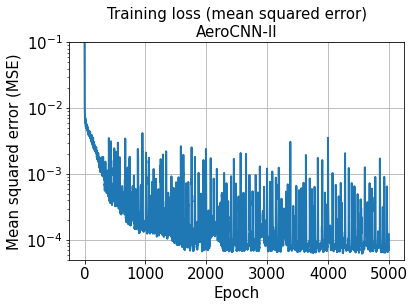

In [32]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)\nAeroCNN-II', size=15)
plt.xlabel('Epoch', size=15)
plt.ylabel('Mean squared error (MSE)', size=15)
plt.yscale('log')
plt.ylim([5e-5, 1e-1])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

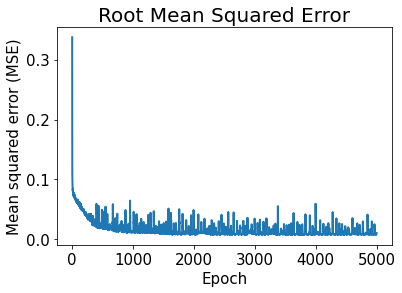

In [33]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=20)
plt.xlabel('Epoch', size=15)
plt.ylabel('Mean squared error (MSE)', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

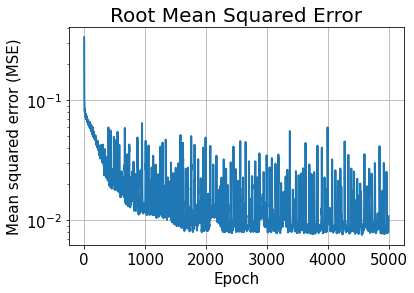

In [34]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=20)
plt.xlabel('Epoch', size=15)
plt.ylabel('Mean squared error (MSE)', size=15)
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

In [35]:
test_results = model.evaluate(x_train)

63/63 [==============================] - 0s 1ms/step - loss: 5.3554e-06 - rmse: 0.0000e+00


In [36]:
decoded_train = model.predict(x_train)

63/63 [==============================] - 0s 2ms/step


In [37]:
x_train.shape

(2016, 100, 100, 1)

In [38]:
decoded_test = model.predict(x_test)

4/4 [==============================] - 0s 9ms/step


In [39]:
error_train_abs = np.abs(decoded_train - y_train)

In [40]:
error_test_abs = np.abs(decoded_test - y_test)

In [41]:
error_train_Cl_abs = np.abs(decoded_train[:,0,:] - y_train[:,0,:])

In [42]:
error_train_Cd_abs = np.abs(decoded_train[:,1,:] - y_train[:,1,:])

In [43]:
error_test_Cl_abs = np.abs(decoded_test[:,0,:] - y_test[:,0,:])

In [44]:
error_test_Cd_abs = np.abs(decoded_test[:,1,:] - y_test[:,1,:])

In [45]:
decoded_train.shape

(2016, 2, 1)

In [46]:
os.chdir("D:\\TrainedModels\\20221005")
model.save('AeroCNN-II_25kernel_2by2MaxPooling_3CNNlayer_testSize0.05.h5', overwrite=True, include_optimizer=True, save_format='h5')

In [47]:
l2_error_train = np.sqrt(np.sum((decoded_train - y_train)**2) / np.sum(y_train**2))
print(l2_error_train)

0.018891616553952186


In [48]:
l2_error_test = np.sqrt(np.sum((decoded_test - y_test)**2) / np.sum(y_test**2))
print(l2_error_test)

0.14017089576946834


In [49]:
l2_error_Cl_train = np.sqrt(np.sum((decoded_train[:,0,:] - y_train[:,0,:])**2) / np.sum(y_train[:,0,:]**2))
print(l2_error_Cl_train)

0.018295629985976926


In [50]:
np.sum((decoded_test[:,0,:]-y_test[:,0,:])**2)/112

0.01000119955208648

In [51]:
print(y_train[:,0,:].shape)
print(y_test[:,0,:].shape)

(2016, 1)
(112, 1)


In [52]:
(y_train[:,0,:]**2).shape

(2016, 1)

In [53]:
print(np.sum(y_train[:,0,:]**2))
print(np.sum(y_test[:,0,:]**2))

1079.371519111567
60.289938139134605


In [54]:
tt = y_test[:,0,:]-decoded_test[:,0,:]
tt.shape

(112, 1)

In [55]:
tt2=tt**2
tt2.shape

(112, 1)

In [56]:
print(np.max(tt2))
print(np.min(tt2))
print(np.mean(tt2))

0.19205376787201445
2.801266418835596e-08
0.01000119955208648


In [57]:
np.sum(tt2)

1.1201343498336858

In [58]:
print(np.sum((y_train[:,0,:]-decoded_train[:,0,:])**2))
print(np.sum((y_test[:,0,:]-decoded_test[:,0,:])**2))

0.3612981112545637
1.1201343498336858


In [59]:
print(0.6277371414722742/1079.371519111567)
print(1.414096538091518/60.289938139134605)

0.0005815765288943014
0.023454934301443884


In [60]:
print(np.sqrt(0.0005815765288943014))
print(np.sqrt(0.023454934301443884))

0.024115897845493985
0.15315003852903167


In [61]:
print(np.sqrt(0.6277371414722742/60.289938139134605))
print(np.sqrt(1.414096538091518/1079.371519111567))

0.1020390704351555
0.03619545599983362


In [62]:
l2_error_Cd_train = np.sqrt(np.sum((decoded_train[:,1,:] - y_train[:,1,:])**2) / np.sum(y_train[:,1,:]**2))
print(l2_error_Cd_train)

0.03063649583437353


In [63]:
l2_error_Cl_test = np.sqrt(np.sum((decoded_test[:,0,:] - y_test[:,0,:])**2) / np.sum(y_test[:,0,:]**2))
print(l2_error_Cl_test)

0.13630526724048583


In [64]:
l2_error_Cd_test = np.sqrt(np.sum((decoded_test[:,1,:] - y_test[:,1,:])**2) / np.sum(y_test[:,1,:]**2))
print(l2_error_Cd_test)

0.21906372922851003


In [65]:
l2_error_train_list = []
for i in range(0, len(aa_train)):
    l2_error_train_data = np.sqrt(np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2))
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00924091007015528, 0.010654067397786099, 0.012564371145353687, 0.003141299671134351, 0.016547117292798057, 0.07147789565511127, 0.0010425930430219901, 0.00784769908457035, 0.010243409713590718, 0.0004198335339306535, 0.050727797539691276, 0.008843351976269512, 0.009432240433636599, 0.004276483180500244, 0.006440894732090148, 0.027123739125205618, 0.04627986789566402, 0.026007285383344105, 0.03145898092302593, 0.015940328354003535, 0.0704261598774686, 0.10079829554948612, 0.02382434831308263, 0.006755974315252442, 0.010491543186147062, 0.006799307024867967, 0.1101226549492055, 0.029342355694480744, 0.010513445526301499, 0.14767389197405287, 0.07232053448943189, 0.083072466305829, 0.017089597625133367, 0.01719598861995248, 0.0335317732431492, 0.08172575485208673, 0.053588861758935055, 0.03409617448149605, 0.03701548591819799, 0.005934857865509057, 0.0019112627518697402, 0.015389267133885203, 0.026274346814135388, 0.005333374720658418, 0.024087007302915076, 0.0027092598217460773, 0.009

In [66]:
l2_error_test_list = []
for i in range(0, len(aa_test)):
    l2_error_test_data = np.sqrt(np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2))
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.010666242625468983, 0.019947976063649307, 0.03350034224111861, 0.07964405845043575, 0.17279214769358375, 0.10858677978239524, 0.1682401891968488, 0.025192157172698505, 0.04182874787253573, 0.05994399416090314, 0.31394735843520244, 0.021053232440693306, 0.14309126908773206, 0.378432371182642, 0.07092587636787925, 0.09847596940421975, 0.06816224605264608, 0.10956792164014745, 0.044111934553868776, 0.07854216352675078, 0.9483820573809688, 0.1420834149427735, 0.00717016769621079, 0.22204955692681297, 0.07658367609407181, 0.029577059928386665, 0.06896491213695476, 0.01387377011436903, 0.012076350150965866, 0.06089004860330745, 0.0995453638037314, 0.2988199292306455, 0.020980717449688966, 0.08825277702944034, 0.035252247111862284, 0.14698611057921837, 0.44934420687771925, 0.7669284217308726, 0.30297280740126453, 0.1554380736763129, 0.17714258758898382, 0.17103867247807278, 0.6524562906576019, 0.039795347807042976, 0.09644437872281189, 0.2805790441622359, 0.00869469220519024, 0.07470968253

In [67]:
l2_error_Cl_train_list = []
for i in range(0, len(aa_train)):
    l2_error_Cl_train_data = np.sqrt(np.sum((decoded_train[:,0,:][i] - y_train[:,0,:][i])**2) / np.sum(y_train[:,0,:][i]**2))
    l2_error_Cl_train_list.append(l2_error_Cl_train_data)
print(l2_error_Cl_train_list)

[0.003941048869377701, 0.0008117536080320835, 0.006882540883159748, 0.002798222433702543, 0.015728925143868273, 0.07181374916943715, 0.0005226107330176509, 0.0063487638687576824, 0.008406984771542999, 0.000147709774199567, 0.04830203665349815, 0.0030885197423878657, 0.0075270949636604915, 0.0044950696443428004, 0.006837357056422328, 0.02202446504752045, 0.04298022533703666, 0.02547407091926201, 0.03142571040440439, 0.01595569516490645, 0.07069089339215122, 0.1029686758013697, 0.023415161297053597, 0.005707681981987256, 0.009322453312241321, 0.0068048152260651515, 0.1117279782632789, 0.03010353260786289, 0.010966529362273447, 0.14884771547299894, 0.07537793796354683, 0.08829735011979475, 0.01532748669224765, 0.015154778654390435, 0.032691019644494064, 0.08117859517920512, 0.04470980739308223, 0.03241931772617496, 0.03703023810926753, 0.003060913085920131, 0.0016287734017748645, 0.015200425220226245, 0.02533087994643582, 0.0017651332543722543, 0.024832166422732036, 0.0028305122069823786,

In [68]:
l2_error_Cd_train_list = []
for i in range(0, len(aa_train)):
    l2_error_Cd_train_data = np.sqrt(np.sum((decoded_train[:,1,:][i] - y_train[:,1,:][i])**2) / np.sum(y_train[:,1,:][i]**2))
    l2_error_Cd_train_list.append(l2_error_Cd_train_data)
print(l2_error_Cd_train_list)

[0.03726257840524456, 0.06244695886290611, 0.13470137306604912, 0.03214119792995489, 0.06276916877495307, 0.06521722023838807, 0.0177900970247998, 0.14335235933373527, 0.21023693810860497, 0.008965313062720567, 0.15261582830034928, 0.03653116553682875, 0.022264627392464632, 0.0002302981803378561, 0.0006057046011319477, 0.05184310239054174, 0.09092274798212921, 0.13186074996818672, 0.053064142104676824, 0.0006311694256915619, 0.0320570385986783, 0.02980304451034969, 0.08579285715732639, 0.10746257350029785, 0.16257784160377178, 0.002644773560992298, 0.05822602716077548, 0.00805577631674012, 0.00045905171220646615, 0.13616572738709282, 0.036593544791228276, 0.041391650679211626, 0.03691988052414372, 0.06055396921858805, 0.17461637775206262, 0.1776139089644717, 0.11301926974193371, 0.1354306508242768, 0.024229766817558476, 0.19209806700563012, 0.04419790716505893, 0.1102481441356066, 0.29074387894293824, 0.16514765168484383, 0.0015138704744801041, 0.00038017960697246883, 0.018284796261544

In [69]:
np.sqrt(np.sum((decoded_train[:,1,:][36] - y_train[:,1,:][36])**2) / np.sum(y_train[:,1,:][36]**2))

0.11301926974193371

In [70]:
l2_error_Cl_test_list = []
for i in range(0, len(aa_test)):
    l2_error_Cl_test_data = np.sqrt(np.sum((decoded_test[:,0,:][i] - y_test[:,0,:][i])**2) / np.sum(y_test[:,0,:][i]**2))
    l2_error_Cl_test_list.append(l2_error_Cl_test_data)
print(l2_error_Cl_test_list)

[0.010766532539946935, 0.020219039646940006, 0.03151013472234631, 0.07956168791813434, 0.17285695981604865, 0.10975201730360698, 0.16837958367488357, 0.02512985713395783, 0.0418610858924028, 0.05938449308364127, 0.31504805843555334, 0.021606722474090876, 0.14529143709562845, 0.38985036469113993, 0.07231300814884245, 0.1043949927948472, 0.06819695686042566, 0.1096271377408377, 0.04404905574459046, 0.07868215195793304, 1.365730990465292, 0.14250624072491486, 0.007175013682591323, 0.22207139271517418, 0.07657067870089915, 0.029151412778350094, 0.06898856508888214, 0.013813739521118794, 0.004860132124528707, 0.05900565689686291, 0.10143969897476417, 0.30612736128724827, 0.021450491415045736, 0.08934038707589913, 0.026328817466389043, 0.14711070142986807, 0.45127203374015457, 0.7821307888194313, 0.3032726326796029, 0.15514289963564104, 0.17697807068899185, 0.17123288406325582, 0.6559415118336064, 0.0408089221174354, 0.09917597461679252, 0.28330530662275816, 0.0037204808648082345, 0.07063116

In [71]:
l2_error_Cd_test_list = []
for i in range(0, len(aa_test)):
    l2_error_Cd_test_data = np.sqrt(np.sum((decoded_test[:,1,:][i] - y_test[:,1,:][i])**2) / np.sum(y_test[:,1,:][i]**2))
    l2_error_Cd_test_list.append(l2_error_Cd_test_data)
print(l2_error_Cd_test_list)

[0.008525241687683437, 0.0036260169682503034, 0.15529621160855725, 0.10516503904597262, 0.16646483497370837, 0.07148401650840613, 0.09357178484335436, 0.056840379872705654, 0.012911993258895214, 0.12860405527132046, 0.27715292138445774, 0.0040861752902657845, 0.1111858737661241, 0.24224471982927848, 0.05803126607758414, 0.04334356979671314, 0.015685632398165682, 0.023887053333568494, 0.0716386669224094, 0.04388479534174008, 0.04618130345005574, 0.025302881685546504, 0.002492087252452885, 0.19272043633271976, 0.0959881447389456, 0.21069581326716094, 0.009734760650291472, 0.040765489426931534, 0.2097640996244771, 0.16273546732470875, 0.029497073743535572, 0.2550252014227947, 0.008918282300153665, 0.0018836055822583238, 0.3601017152837373, 0.06917080246083493, 0.047311103708915864, 0.12156997008211048, 0.133723366780758, 0.3341046667371555, 0.31089588004900637, 0.010316300273056266, 0.2805747033876642, 0.0007317273282067704, 0.04270092836860852, 0.24706267553467098, 0.024878532565685757, 

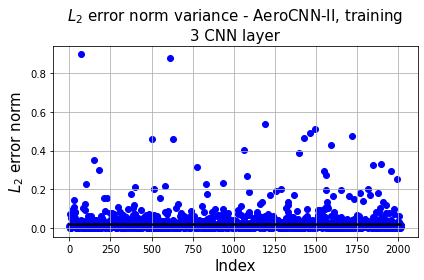

In [72]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - AeroCNN-II, training\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

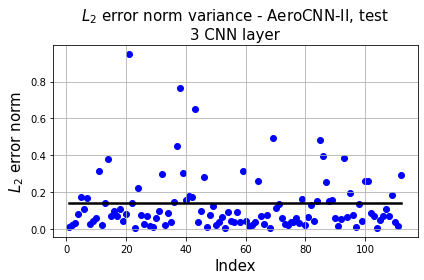

In [73]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - AeroCNN-II, test\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

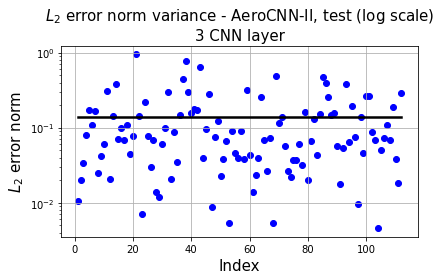

In [74]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variance - AeroCNN-II, test (log scale)\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

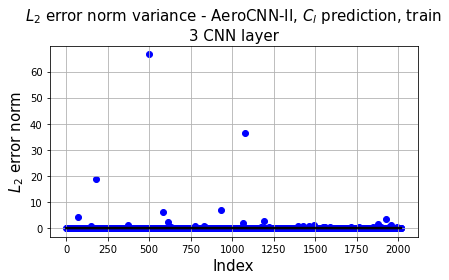

In [75]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_Cl_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_Cl_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - AeroCNN-II, $C_l$ prediction, train\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

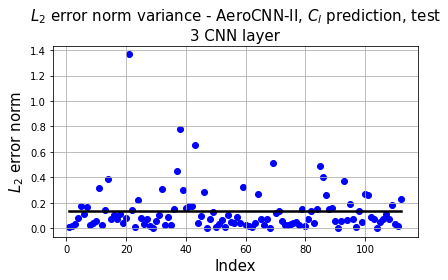

In [76]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_Cl_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_Cl_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - AeroCNN-II, $C_l$ prediction, test\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

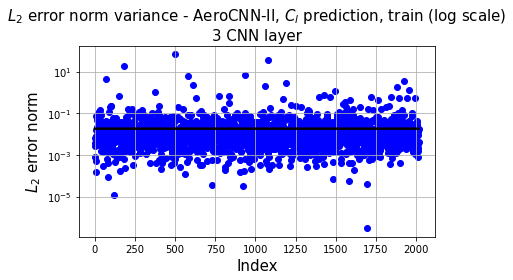

In [77]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_Cl_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_Cl_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variance - AeroCNN-II, $C_l$ prediction, train (log scale)\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

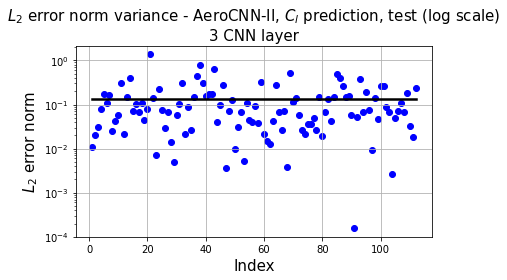

In [78]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_Cl_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_Cl_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.yscale('log')
plt.title('$L_2$ error norm variance - AeroCNN-II, $C_l$ prediction, test (log scale)\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

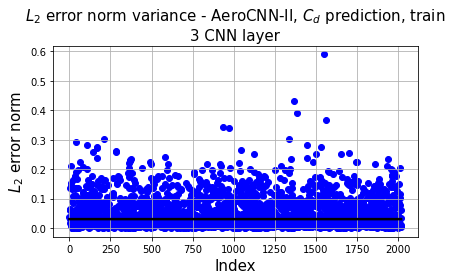

In [79]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_Cd_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_Cd_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - AeroCNN-II, $C_d$ prediction, train\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

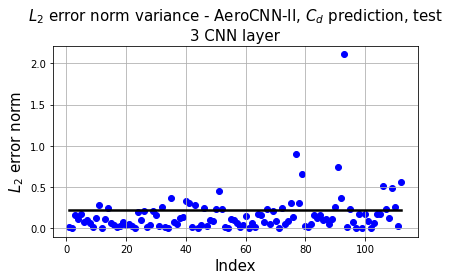

In [80]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_Cd_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_Cd_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - AeroCNN-II, $C_d$ prediction, test\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

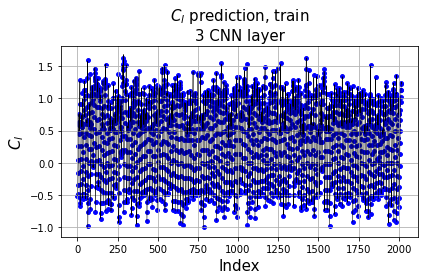

In [81]:
plt.plot(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), y_train[:,0,:], 'k',lw=0.5)
plt.scatter(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), decoded_train[:,0,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.title('$C_l$ prediction, train\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

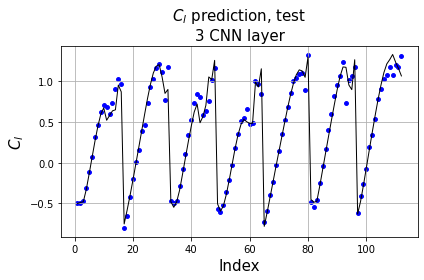

In [82]:
plt.plot(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), y_test[:,0,:], 'k',lw=1)
plt.scatter(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), decoded_test[:,0,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.title('$C_l$ prediction, test\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

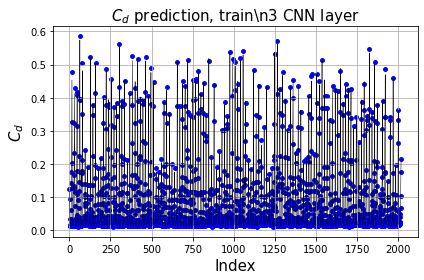

In [83]:
plt.plot(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), y_train[:,1,:], 'k',lw=0.5)
plt.scatter(np.linspace(1, decoded_train.shape[0], decoded_train.shape[0]), decoded_train[:,1,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.title(r'$C_d$ prediction, train\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

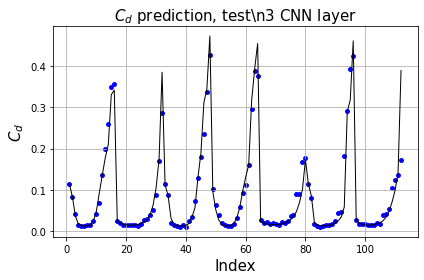

In [84]:
plt.plot(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), y_test[:,1,:], 'k',lw=1)
plt.scatter(np.linspace(1, decoded_test.shape[0], decoded_test.shape[0]), decoded_test[:,1,:], c='b', s=15)
plt.xlabel('Index', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.title(r'$C_d$ prediction, test\n3 CNN layer', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

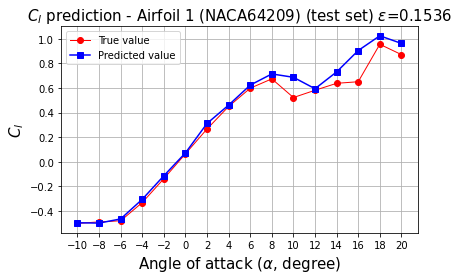

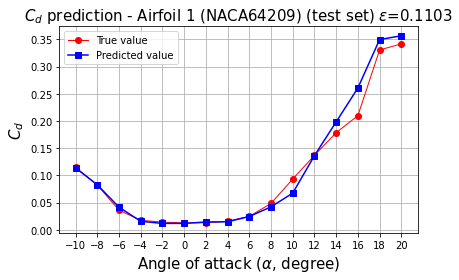

In [85]:
airfoiltest1_predict = decoded_test[16*0:16*1]

airfoiltest1_cl=y_test[16*0:16*1,0,:]
airfoiltest1_cd=y_test[16*0:16*1,1,:]

epsilonCl = np.sqrt(np.sum((airfoiltest1_predict[:,0,:] - airfoiltest1_cl)**2) / np.sum(airfoiltest1_cl**2))
epsilonCd = np.sqrt(np.sum((airfoiltest1_predict[:,1,:] - airfoiltest1_cd)**2) / np.sum(airfoiltest1_cd**2))

plt.plot(alpha, airfoiltest1_cl.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltest1_predict[:,0,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_l$ prediction - Airfoil 1 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[0*16][0])[2:-1], epsilonCl), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoiltest1_cd.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltest1_predict[:,1,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_d$ prediction - Airfoil 1 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[0*16][0])[2:-1], epsilonCd), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

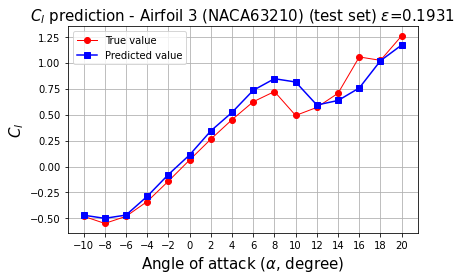

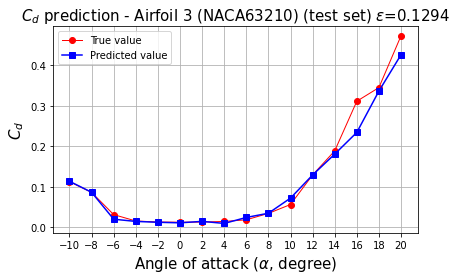

In [86]:
airfoiltest37_predict = decoded_test[16*2:16*3]

airfoiltest37_cl=y_test[16*2:16*3,0,:]
airfoiltest37_cd=y_test[16*2:16*3,1,:]

epsilonCl = np.sqrt(np.sum((airfoiltest37_predict[:,0,:] - airfoiltest37_cl)**2) / np.sum(airfoiltest37_cl**2))
epsilonCd = np.sqrt(np.sum((airfoiltest37_predict[:,1,:] - airfoiltest37_cd)**2) / np.sum(airfoiltest37_cd**2))

plt.plot(alpha, airfoiltest37_cl.reshape(16,), 'r', marker='o',lw=1)
plt.plot(alpha, airfoiltest37_predict[:,0,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_l$ prediction - Airfoil 3 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[2*16][0])[2:-1], epsilonCl), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoiltest37_cd.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltest37_predict[:,1,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_d$ prediction - Airfoil 3 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[2*16][0])[2:-1], epsilonCd), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

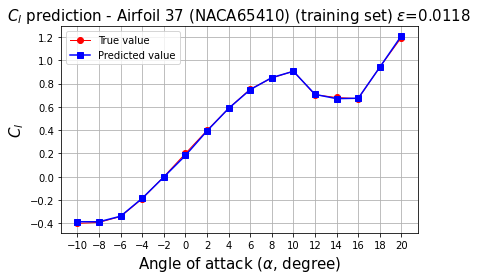

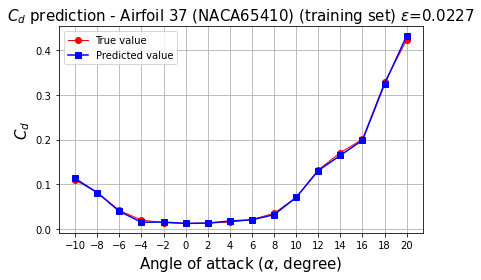

In [87]:
airfoiltrain37_predict = decoded_train[16*36:16*37]

airfoiltrain37_cl=y_train[16*36:16*37,0,:]
airfoiltrain37_cd=y_train[16*36:16*37,1,:]

epsilonCl = np.sqrt(np.sum((airfoiltrain37_predict[:,0,:] - airfoiltrain37_cl)**2) / np.sum(airfoiltrain37_cl**2))
epsilonCd = np.sqrt(np.sum((airfoiltrain37_predict[:,1,:] - airfoiltrain37_cd)**2) / np.sum(airfoiltrain37_cd**2))

plt.plot(alpha, airfoiltrain37_cl.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltrain37_predict[:,0,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title('$C_l$ prediction - Airfoil 37 (%s) (training set) $\epsilon$=%.4f' % (str(geo_train[36*16][0])[2:-1], epsilonCl), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoiltrain37_cd.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltrain37_predict[:,1,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title('$C_d$ prediction - Airfoil 37 (%s) (training set) $\epsilon$=%.4f' % (str(geo_train[36*16][0])[2:-1], epsilonCd), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

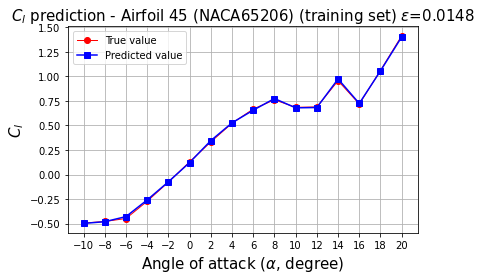

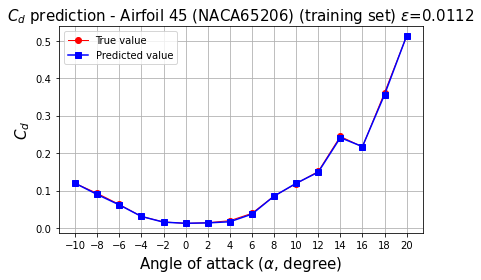

In [88]:
airfoiltrain45_predict = decoded_train[16*44:16*45]

airfoiltrain45_cl=y_train[16*44:16*45,0,:]
airfoiltrain45_cd=y_train[16*44:16*45,1,:]

epsilonCl = np.sqrt(np.sum((airfoiltrain45_predict[:,0,:] - airfoiltrain45_cl)**2) / np.sum(airfoiltrain45_cl**2))
epsilonCd = np.sqrt(np.sum((airfoiltrain45_predict[:,1,:] - airfoiltrain45_cd)**2) / np.sum(airfoiltrain45_cd**2))

plt.plot(alpha, airfoiltrain45_cl.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltrain45_predict[:,0,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_l$ prediction - Airfoil 45 (%s) (training set) $\epsilon$=%.4f' % (str(geo_train[44*16][0])[2:-1], epsilonCl),
          fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoiltrain45_cd.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltrain45_predict[:,1,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_d$ prediction - Airfoil 45 (%s) (training set) $\epsilon$=%.4f' % (str(geo_train[44*16][0])[2:-1], epsilonCd),
          fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

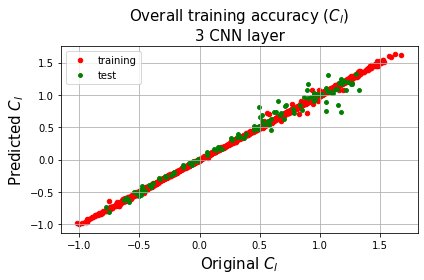

In [89]:
plt.scatter(y_train[:,0,:], decoded_train[:,0,:], c='r', s=20)
plt.scatter(y_test[:,0,:], decoded_test[:,0,:], c='g', s=15)
plt.xlabel('Original $C_l$', fontsize=15)
plt.ylabel('Predicted $C_l$', fontsize=15)
plt.title('Overall training accuracy ($C_l$)\n3 CNN layer', fontsize=15)

plt.grid()
plt.legend(['training', 'test'])
plt.tight_layout()
plt.show()

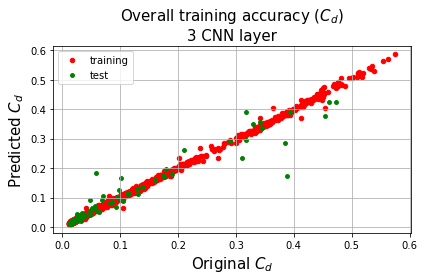

In [90]:
plt.scatter(y_train[:,1,:], decoded_train[:,1,:], c='r', s=20)
plt.scatter(y_test[:,1,:], decoded_test[:,1,:], c='g', s=15)
plt.xlabel('Original $C_d$', fontsize=15)
plt.ylabel('Predicted $C_d$', fontsize=15)
plt.title('Overall training accuracy ($C_d$)\n3 CNN layer', fontsize=15)
plt.grid()
plt.legend(['training', 'test'])
plt.tight_layout()
plt.show()

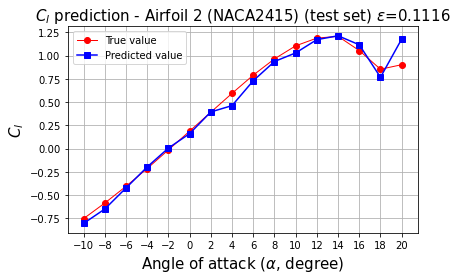

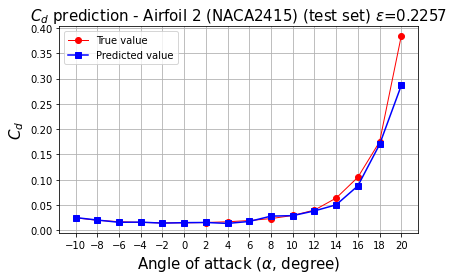

In [91]:
airfoiltest3_predict = decoded_test[16*1:16*2]

airfoiltest3_cl=y_test[16*1:16*2,0,:]
airfoiltest3_cd=y_test[16*1:16*2,1,:]

epsilonCl = np.sqrt(np.sum((airfoiltest3_predict[:,0,:] - airfoiltest3_cl)**2) / np.sum(airfoiltest3_cl**2))
epsilonCd = np.sqrt(np.sum((airfoiltest3_predict[:,1,:] - airfoiltest3_cd)**2) / np.sum(airfoiltest3_cd**2))

plt.plot(alpha, airfoiltest3_cl.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltest3_predict[:,0,:].reshape(16,), marker='s', c='b')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_l$ prediction - Airfoil 2 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[1*16][0])[2:-1], epsilonCl), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoiltest3_cd.reshape(16,), 'r', marker='o', lw=1)
plt.plot(alpha, airfoiltest3_predict[:,1,:].reshape(16,), marker='s',c='b')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_d$ prediction - Airfoil 2 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[1*16][0])[2:-1], epsilonCd), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

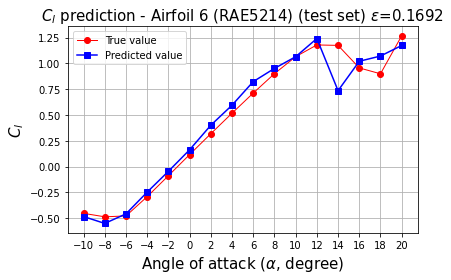

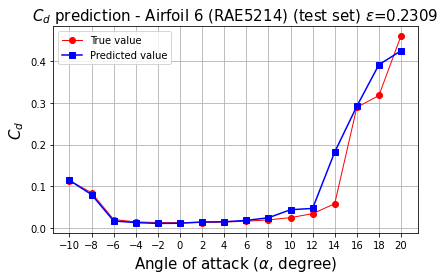

In [92]:
airfoiltest11_predict = decoded_test[16*5:16*6]

airfoiltest11_cl=y_test[16*5:16*6,0,:]
airfoiltest11_cd=y_test[16*5:16*6,1,:]

epsilonCl = np.sqrt(np.sum((airfoiltest11_predict[:,0,:] - airfoiltest11_cl)**2) / np.sum(airfoiltest11_cl**2))
epsilonCd = np.sqrt(np.sum((airfoiltest11_predict[:,1,:] - airfoiltest11_cd)**2) / np.sum(airfoiltest11_cd**2))

plt.plot(alpha, airfoiltest11_cl.reshape(16,), c='r', marker='o', lw=1)
plt.plot(alpha, airfoiltest11_predict[:,0,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_l$ prediction - Airfoil 6 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[5*16][0])[2:-1], epsilonCl), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoiltest11_cd.reshape(16,), c='r', marker='o', lw=1)
plt.plot(alpha, airfoiltest11_predict[:,1,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_d$ prediction - Airfoil 6 (%s) (test set) $\epsilon$=%.4f' % (str(geo_test[5*16][0])[2:-1], epsilonCd), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

In [93]:
np.sqrt(((1.2-1.3)**2)/(1.3**2))

0.07692307692307698

In [94]:
np.sqrt(((0.07-0.01)**2)/(0.01**2))

6.000000000000001

In [95]:
geometry

array([[[b'NACA0006'],
        [b'NACA0006'],
        [b'NACA0006'],
        ...,
        [b'NACA0006'],
        [b'NACA0006'],
        [b'NACA0006']],

       [[b'NACA0008'],
        [b'NACA0008'],
        [b'NACA0008'],
        ...,
        [b'NACA0008'],
        [b'NACA0008'],
        [b'NACA0008']],

       [[b'NACA000834'],
        [b'NACA000834'],
        [b'NACA000834'],
        ...,
        [b'NACA000834'],
        [b'NACA000834'],
        [b'NACA000834']],

       ...,

       [[b'RAF48'],
        [b'RAF48'],
        [b'RAF48'],
        ...,
        [b'RAF48'],
        [b'RAF48'],
        [b'RAF48']],

       [[b'RAF6'],
        [b'RAF6'],
        [b'RAF6'],
        ...,
        [b'RAF6'],
        [b'RAF6'],
        [b'RAF6']],

       [[b'RAF69'],
        [b'RAF69'],
        [b'RAF69'],
        ...,
        [b'RAF69'],
        [b'RAF69'],
        [b'RAF69']]], dtype='|S32')

In [104]:
geometry_orig

array(['NACA0006', 'NACA0008', 'NACA000834', 'NACA0009', 'NACA0010',
       'NACA001034', 'NACA001035', 'NACA001064', 'NACA001065',
       'NACA001066', 'NACA0012', 'NACA001234', 'NACA001264', 'NACA0015',
       'NACA0018', 'NACA0021', 'NACA0024', 'NACA1408', 'NACA1410',
       'NACA1412', 'NACA16006', 'NACA16009', 'NACA16012', 'NACA16015',
       'NACA16018', 'NACA16021', 'NACA23012', 'NACA23015', 'NACA23018',
       'NACA23021', 'NACA23024', 'NACA2408', 'NACA2410', 'NACA2411',
       'NACA2412', 'NACA2415', 'NACA2418', 'NACA2421', 'NACA2424',
       'NACA4412', 'NACA4415', 'NACA4418', 'NACA4421', 'NACA4424',
       'NACA63010a', 'NACA63012a', 'NACA63015a', 'NACA631212',
       'NACA631412', 'NACA63206', 'NACA63209', 'NACA63210', 'NACA632215',
       'NACA632415', 'NACA632615', 'NACA632a015', 'NACA633018',
       'NACA633218', 'NACA633418', 'NACA634221', 'NACA634421',
       'NACA63a210', 'NACA64008a', 'NACA6409', 'NACA641012',
       'NACA641012a', 'NACA64108', 'NACA64110', 'NACA6411

In [105]:
np.where(geometry_orig == "NACA64a410")

(array([86], dtype=int64),)

In [109]:
decoded86 = model.predict(image[86:87].reshape((16,100,100,1)))

1/1 [==============================] - 0s 20ms/step


In [111]:
decoded86.shape

(16, 2, 1)

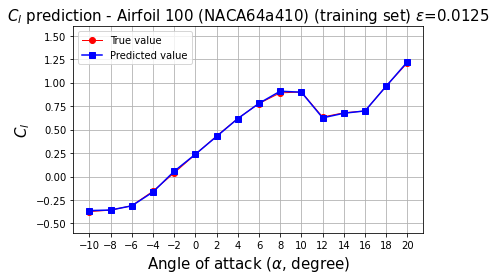

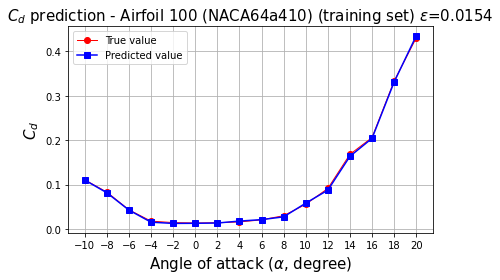

In [223]:
airfoiltest11_predict = decoded86

airfoiltest11_cl=y[86][:,0,:]
airfoiltest11_cd=y[86][:,1,:]

epsilonCl = np.sqrt(np.sum((airfoiltest11_predict[:,0,:] - airfoiltest11_cl)**2) / np.sum(airfoiltest11_cl**2))
epsilonCd = np.sqrt(np.sum((airfoiltest11_predict[:,1,:] - airfoiltest11_cd)**2) / np.sum(airfoiltest11_cd**2))

plt.plot(alpha, airfoiltest11_cl.reshape(16,), c='r', marker='o', lw=1)
plt.plot(alpha, airfoiltest11_predict[:,0,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_l$', fontsize=15)
plt.xticks(alpha, label=alpha)
#plt.xlim([-10, 35])
plt.ylim([-0.6, 1.6])
plt.title(r'$C_l$ prediction - Airfoil 100 (%s) (training set) $\epsilon$=%.4f' % (str(geometry_orig[86]), epsilonCl), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(alpha, airfoiltest11_cd.reshape(16,), c='r', marker='o', lw=1)
plt.plot(alpha, airfoiltest11_predict[:,1,:].reshape(16,), c='b', marker='s')
plt.xlabel(r'Angle of attack ($\alpha$, degree)', fontsize=15)
plt.ylabel('$C_d$', fontsize=15)
plt.xticks(alpha, label=alpha)
plt.title(r'$C_d$ prediction - Airfoil 100 (%s) (training set) $\epsilon$=%.4f' % (str(geometry_orig[86]), epsilonCd), fontsize=15)
plt.legend(['True value', 'Predicted value'])
plt.grid()
plt.tight_layout()
plt.show()

In [222]:
geo_train[16*99]

array([b'NACA64a410'], dtype='|S32')